In [38]:
! pip install kaggle

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/’: File exists


In [5]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 98% 572M/586M [00:04<00:00, 88.2MB/s]
100% 586M/586M [00:05<00:00, 123MB/s] 


In [8]:
! unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [1]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dataset_dir = "/content/raw-img"

images = []
labels = []

# Define target image size (e.g., 64x64)
target_size = (128, 128)

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        # print("Processing class:", class_name)
        for image_name in os.listdir(class_dir):
            if image_name.endswith(".jpeg") or image_name.endswith(".jpg") or image_name.endswith(".png"):
                image_path = os.path.join(class_dir, image_name)
                # print("Loading image:", image_path)
                try:
                    image = Image.open(image_path)
                    # Resize image to target size
                    image = image.resize(target_size)
                    # Convert image to grayscale and then to numpy array
                    image = np.array(image.convert('L'))  # 'L' mode converts to grayscale
                    images.append(image)
                    labels.append(class_name)
                except Exception as e:
                    print("Error loading image:", image_path)
                    print(e)

X_data = np.array(images)
y_data = np.array(labels)

print("Number of images:", len(X_data))
print("Number of labels:", len(y_data))


Number of images: 26179
Number of labels: 26179


In [3]:
from sklearn.model_selection import train_test_split
X_train_partial, X_test, y_train_partial, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=42)

X_valid, X_train = X_train_partial[:5000] / 255.0, X_train_partial[5000:] / 255.0
y_valid, y_train = y_train_partial[:5000], y_train_partial[5000:]

X_test = X_test

In [4]:
X_train.shape


(15943, 128, 128)

In [5]:
X_train.dtype

dtype('float64')

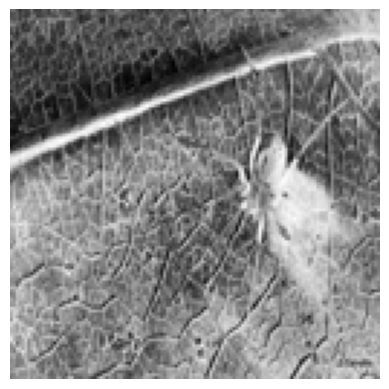

In [6]:
plt.imshow(X_train[9], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Verify the encoded labels
print("Encoded training labels:", y_train_encoded)
print("Encoded validation labels:", y_valid_encoded)

# Encode test labels
y_test_encoded = label_encoder.transform(y_test)



Encoded training labels: [4 9 4 ... 3 0 9]
Encoded validation labels: [2 8 7 ... 4 6 4]


In [8]:
y_train_encoded

array([4, 9, 4, ..., 3, 0, 9])

In [9]:
class_names =["butterfly", "cat", "chicken", "cow", "dog", "elephant", "horse", "sheep", "spider", "squirrel"]

In [10]:
class_names[y_train_encoded[0]]

'dog'

In [11]:
X_valid.shape

(5000, 128, 128)

In [12]:
X_test.shape

(5236, 128, 128)

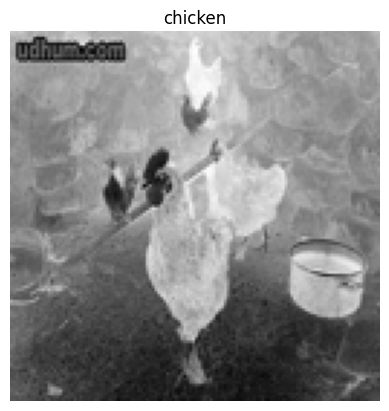

In [13]:
index = 30
plt.imshow(X_train[index], cmap="binary")
plt.title(class_names[y_train_encoded[index]], fontsize=12)
plt.axis('off')
plt.show()

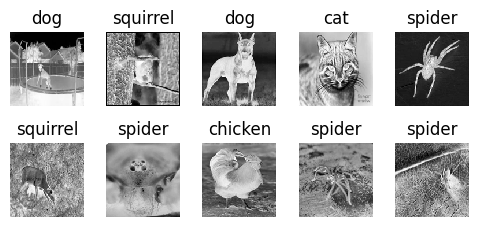

In [14]:
n_rows = 2
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_encoded[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [26]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128)),
    tf.keras.layers.Dense(units=512, activation='relu'),  # Increase units to 512
    # tf.keras.layers.Dropout(0.5),  # Dropout layer after the first dense layer with a dropout rate of 0.5 (50%)
    tf.keras.layers.Dense(units=256, activation='relu'),  # Add another dense layer with 256 units
    # tf.keras.layers.Dropout(0.5),  # Dropout layer after the first dense layer with a dropout rate of 0.5 (50%)
    tf.keras.layers.Dense(units=128, activation='relu'),  # Add another dense layer with 128 units
    # tf.keras.layers.Dropout(0.5),  # Dropout layer after the first dense layer with a dropout rate of 0.5 (50%)
    tf.keras.layers.Dense(units=64, activation='relu'),   # Add another dense layer with 64 units
    # tf.keras.layers.Dropout(0.5),  # Dropout layer after the first dense layer with a dropout rate of 0.5 (50%)
    tf.keras.layers.Dense(units=10, activation='softmax')                        # Output layer
])


In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               8389120   
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 8562250 (32.66 MB)
Trainable params: 856

In [28]:
# learningRate = 0.001
# lrSchedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     learningRate,
#     decay_steps=1000,
#     decay_rate=0.9,
#     staircase=True
# )

# optimizer = tf.keras.optimizers.Adam(learning_rate=lrSchedule)

In [29]:
cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
history = cnn.fit(X_train, y_train_encoded, batch_size=100, epochs=50, validation_data=(X_valid, y_valid_encoded) )

Epoch 1/50
 64/160 [===========>..................] - ETA: 25s - loss: 2.9905 - accuracy: 0.1542

In [ ]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test_encoded)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

In [ ]:
predict = cnn.predict(X_test[:3])

prediction = np.argmax(predict, axis = 1)
print("Predictions: ", prediction)
print("Labels: ", y_test_encoded[:3])